In [1]:
%matplotlib notebook
%matplotlib inline

import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gmaps

# import 2012 NC voting data
votingdb_2012 = pd.read_csv('data_import/results_2012.csv')
county_lat_long_pop = pd.read_csv('data_export/cnty_LatLongPop.csv')

# visualize data set
votingdb_2012

,county,vtd,contest_type,runoff_status,recount_status,contest,choice,winner_status,party,Election Day,One Stop,Absentee by Mail,Provisional,total votes,district
0,ALAMANCE,1,S,0,0,PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,Obama/Biden,0,DEM,225,237,21,5,488,Not Found
1,ALAMANCE,2,S,0,0,PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,Obama/Biden,0,DEM,219,184,26,0,429,Not Found
2,ALAMANCE,35,S,0,0,PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,Obama/Biden,0,DEM,409,362,52,9,832,Not Found
3,ALAMANCE,03C,S,0,0,PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,Obama/Biden,0,DEM,203,288,35,0,526,Not Found
4,ALAMANCE,03N,S,0,0,PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,Obama/Biden,0,DEM,573,473,94,3,1143,Not Found
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65494,DURHAM,18,S,0,0,NC COMMISSIONER OF INSURANCE,Mike Causey,0,REP,26,37,7,1,71,Not Found
65495,DURHAM,19,S,0,0,NC COMMISSIONER OF INSURANCE,Mike Causey,0,REP,92,146,12,2,252,Not Found
65496,DURHAM,20,S,0,0,NC COMMISSIONER OF INSURANCE,Mike Causey,0,REP,43,76,7,0,126,Not Found
65497,DURHAM,21,S,0,0,NC COMMISSIONER OF INSURANCE,Mike Causey,0,REP,92,108,6,1,207,Not Found


In [2]:
# clean the data base
votingdb_2012 = votingdb_2012.dropna()

In [3]:
# create new db with columns to be utilized 
orgd_votingdb_2012 = pd.DataFrame(votingdb_2012[['county', 'contest', 'choice', 'party', 'total votes']])
orgd_votingdb_2012.head()              

,county,contest,choice,party,total votes
0,ALAMANCE,PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,Obama/Biden,DEM,488
1,ALAMANCE,PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,Obama/Biden,DEM,429
2,ALAMANCE,PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,Obama/Biden,DEM,832
3,ALAMANCE,PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,Obama/Biden,DEM,526
4,ALAMANCE,PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,Obama/Biden,DEM,1143


In [4]:
# goal here is to isolate just the votes for President
# first set 'contest' as the index, then use .loc to isolate
contest_index = orgd_votingdb_2012.set_index('contest')
contest_index.head()

,county,choice,party,total votes
contest,,,,
PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,ALAMANCE,Obama/Biden,DEM,488
PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,ALAMANCE,Obama/Biden,DEM,429
PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,ALAMANCE,Obama/Biden,DEM,832
PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,ALAMANCE,Obama/Biden,DEM,526
PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,ALAMANCE,Obama/Biden,DEM,1143


In [5]:
pres_db_2012 = contest_index.loc["PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES"]
pres_db_2012 

,county,choice,party,total votes
contest,,,,
PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,ALAMANCE,Obama/Biden,DEM,488
PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,ALAMANCE,Obama/Biden,DEM,429
PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,ALAMANCE,Obama/Biden,DEM,832
PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,ALAMANCE,Obama/Biden,DEM,526
PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,ALAMANCE,Obama/Biden,DEM,1143
...,...,...,...,...
PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,YANCEY,Johnson/Gray,LIB,9
PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,YANCEY,Johnson/Gray,LIB,0
PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,YANCEY,Johnson/Gray,LIB,0


In [6]:
# grab total votes placed
total_votes_2012 = pres_db_2012['total votes'].sum()
total_votes_2012


4493301

In [7]:
# group by party
party_grouped_2012 = pres_db_2012.groupby(['party'])

# grab total votes placed by party
party_db_2012 = pd.DataFrame(party_grouped_2012['total votes'].sum())
party_db_2012

,total votes
party,
DEM,2178391
LIB,44515
REP,2270395


In [8]:
# add percentage column 
party_percentages_2012 = party_db_2012['total votes']/total_votes_2012
party_db_2012['percentage'] = party_percentages_2012
party_db_2012.style.format({'percentage':'{:.2%}'})

,total votes,percentage
party,,
DEM,2178391,48.48%
LIB,44515,0.99%
REP,2270395,50.53%


In [9]:
# goal is to gather voting information by county 
# get total number of votes per county
grouped_by_county_2012 = pres_db_2012.groupby(['county'])
grouped_by_county_2012.head()

,county,choice,party,total votes
contest,,,,
PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,ALAMANCE,Obama/Biden,DEM,488
PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,ALAMANCE,Obama/Biden,DEM,429
PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,ALAMANCE,Obama/Biden,DEM,832
PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,ALAMANCE,Obama/Biden,DEM,526
PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,ALAMANCE,Obama/Biden,DEM,1143
...,...,...,...,...
PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,YANCEY,Obama/Biden,DEM,318
PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,YANCEY,Obama/Biden,DEM,130
PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,YANCEY,Obama/Biden,DEM,95


In [10]:
total_county_votes_2012 = grouped_by_county_2012['total votes'].sum()
total_county_votes_2012 = pd.DataFrame(total_county_votes_2012)
total_county_votes_2012

,total votes
county,
ALAMANCE,67642
ALEXANDER,17127
ALLEGHANY,5046
ANSON,11238
ASHE,12538
...,...
WAYNE,51254
WILKES,29020
WILSON,39071


In [11]:
total_county_votes_2012['Percentage of NC Votes'] = total_county_votes_2012['total votes'] / total_votes_2012 
total_county_votes_2012

,total votes,Percentage of NC Votes
county,,
ALAMANCE,67642,0.015054
ALEXANDER,17127,0.003812
ALLEGHANY,5046,0.001123
ANSON,11238,0.002501
ASHE,12538,0.002790
...,...,...
WAYNE,51254,0.011407
WILKES,29020,0.006459
WILSON,39071,0.008695


In [12]:
# votes by county by party
# group by county and party, them sum 
grp_county_party_2012 = pres_db_2012.groupby(['county', 'party'])
grp_county_party_2012.head()

,county,choice,party,total votes
contest,,,,
PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,ALAMANCE,Obama/Biden,DEM,488
PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,ALAMANCE,Obama/Biden,DEM,429
PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,ALAMANCE,Obama/Biden,DEM,832
PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,ALAMANCE,Obama/Biden,DEM,526
PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,ALAMANCE,Obama/Biden,DEM,1143
...,...,...,...,...
PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,YANCEY,Johnson/Gray,LIB,29
PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,YANCEY,Johnson/Gray,LIB,16
PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES,YANCEY,Johnson/Gray,LIB,4


In [13]:
county_party_votes_2012 = grp_county_party_2012['total votes'].sum()
county_party_votes_2012 = pd.DataFrame(county_party_votes_2012)
county_party_votes_2012 = county_party_votes_2012.reset_index()
county_party_votes_2012

,county,party,total votes
0,ALAMANCE,DEM,28875
1,ALAMANCE,LIB,597
2,ALAMANCE,REP,38170
3,ALEXANDER,DEM,4611
4,ALEXANDER,LIB,263
...,...,...,...
295,YADKIN,LIB,231
296,YADKIN,REP,12578
297,YANCEY,DEM,3981
298,YANCEY,LIB,140


In [14]:
# merge dataframes 
ncvoting_stats2012 = pd.merge(county_party_votes_2012, total_county_votes_2012, on='county')
ncvoting_stats2012

,county,party,total votes_x,total votes_y,Percentage of NC Votes
0,ALAMANCE,DEM,28875,67642,0.015054
1,ALAMANCE,LIB,597,67642,0.015054
2,ALAMANCE,REP,38170,67642,0.015054
3,ALEXANDER,DEM,4611,17127,0.003812
4,ALEXANDER,LIB,263,17127,0.003812
...,...,...,...,...,...
295,YADKIN,LIB,231,16766,0.003731
296,YADKIN,REP,12578,16766,0.003731
297,YANCEY,DEM,3981,9399,0.002092
298,YANCEY,LIB,140,9399,0.002092


In [15]:
ncvoting_stats2012 = ncvoting_stats2012.rename(columns={'county':'County', 'party':'Party',
                                                        'total votes_x':'Votes by Party',
                                                         'total votes_y':'Votes by County'})
ncvoting_stats2012['Percentage by Party'] = ncvoting_stats2012['Votes by Party']/ncvoting_stats2012['Votes by County']
ncvoting_stats2012.head()

,County,Party,Votes by Party,Votes by County,Percentage of NC Votes,Percentage by Party
0,ALAMANCE,DEM,28875,67642,0.015054,0.426880
1,ALAMANCE,LIB,597,67642,0.015054,0.008826
2,ALAMANCE,REP,38170,67642,0.015054,0.564294
3,ALEXANDER,DEM,4611,17127,0.003812,0.269224
4,ALEXANDER,LIB,263,17127,0.003812,0.015356


In [16]:
ncvoting_stats2012 = ncvoting_stats2012[['County', 'Party', 'Votes by Party', 'Percentage by Party', 'Votes by County', 'Percentage of NC Votes']]
# ncvoting_stats2012.style.format({'Percentage by Party':'{:.2%}', 'Percentage of NC Votes':'{:.2%}'})
ncvoting_stats2012

,County,Party,Votes by Party,Percentage by Party,Votes by County,Percentage of NC Votes
0,ALAMANCE,DEM,28875,0.426880,67642,0.015054
1,ALAMANCE,LIB,597,0.008826,67642,0.015054
2,ALAMANCE,REP,38170,0.564294,67642,0.015054
3,ALEXANDER,DEM,4611,0.269224,17127,0.003812
4,ALEXANDER,LIB,263,0.015356,17127,0.003812
...,...,...,...,...,...,...
295,YADKIN,LIB,231,0.013778,16766,0.003731
296,YADKIN,REP,12578,0.750209,16766,0.003731
297,YANCEY,DEM,3981,0.423556,9399,0.002092
298,YANCEY,LIB,140,0.014895,9399,0.002092


In [17]:
# import 2016 NC voting data 
votingdb_2016 = pd.read_csv('data_import/results1_2016.csv')
votingdb_2016.head()

,County,Election Date,Precinct,Contest Group ID,Contest Type,Contest Name,Choice,Choice Party,Vote For,Election Day,One Stop,Absentee by Mail,Provisional,Total Votes
0,ALAMANCE,11/08/2016,5,1385,S,US HOUSE OF REPRESENTATIVES DISTRICT 6,B. Mark Walker,REP,1,705,685,65,9,1464
1,ALAMANCE,11/08/2016,2,1385,S,US HOUSE OF REPRESENTATIVES DISTRICT 6,B. Mark Walker,REP,1,954,1004,63,5,2026
2,ALAMANCE,11/08/2016,09N,1385,S,US HOUSE OF REPRESENTATIVES DISTRICT 6,B. Mark Walker,REP,1,468,374,26,5,873
3,ALAMANCE,11/08/2016,03C,1385,S,US HOUSE OF REPRESENTATIVES DISTRICT 6,B. Mark Walker,REP,1,438,637,82,4,1161
4,ALAMANCE,11/08/2016,1210,1385,S,US HOUSE OF REPRESENTATIVES DISTRICT 6,B. Mark Walker,REP,1,260,300,32,2,594


In [18]:
# clean the database
votingdb_2016 = votingdb_2016.dropna()

In [19]:
orgd_votingdb_2016 = votingdb_2016[['County', 'Contest Name', 'Choice Party', 'Total Votes']]
orgd_votingdb_2016

,County,Contest Name,Choice Party,Total Votes
0,ALAMANCE,US HOUSE OF REPRESENTATIVES DISTRICT 6,REP,1464
1,ALAMANCE,US HOUSE OF REPRESENTATIVES DISTRICT 6,REP,2026
2,ALAMANCE,US HOUSE OF REPRESENTATIVES DISTRICT 6,REP,873
3,ALAMANCE,US HOUSE OF REPRESENTATIVES DISTRICT 6,REP,1161
4,ALAMANCE,US HOUSE OF REPRESENTATIVES DISTRICT 6,REP,594
...,...,...,...,...
252821,WILSON,NC COURT OF APPEALS JUDGE (GEER),UNA,183
252822,WILSON,NC COURT OF APPEALS JUDGE (GEER),UNA,16
252823,WILSON,NC COURT OF APPEALS JUDGE (GEER),UNA,22
252824,WILSON,NC COURT OF APPEALS JUDGE (GEER),UNA,12


In [20]:
contest_index_2016 = orgd_votingdb_2016.set_index('Contest Name')
contest_index_2016.head()

,County,Choice Party,Total Votes
Contest Name,,,
US HOUSE OF REPRESENTATIVES DISTRICT 6,ALAMANCE,REP,1464
US HOUSE OF REPRESENTATIVES DISTRICT 6,ALAMANCE,REP,2026
US HOUSE OF REPRESENTATIVES DISTRICT 6,ALAMANCE,REP,873
US HOUSE OF REPRESENTATIVES DISTRICT 6,ALAMANCE,REP,1161
US HOUSE OF REPRESENTATIVES DISTRICT 6,ALAMANCE,REP,594


In [21]:
pres_db_2016 = contest_index_2016.loc['US PRESIDENT']
pres_db_2016

,County,Choice Party,Total Votes
Contest Name,,,
US PRESIDENT,AVERY,REP,2110
US PRESIDENT,AVERY,REP,120
US PRESIDENT,AVERY,REP,152
US PRESIDENT,AVERY,REP,550
US PRESIDENT,AVERY,REP,361
...,...,...,...
US PRESIDENT,YADKIN,DEM,95
US PRESIDENT,YADKIN,DEM,15
US PRESIDENT,YADKIN,DEM,172


In [22]:
total_votes_2016= pres_db_2016['Total Votes'].sum()
total_votes_2016

4682073

In [23]:
party_grouped_2016 = pres_db_2016.groupby(['Choice Party'])
party_grouped_2016.head()

,County,Choice Party,Total Votes
Contest Name,,,
US PRESIDENT,AVERY,REP,2110
US PRESIDENT,AVERY,REP,120
US PRESIDENT,AVERY,REP,152
US PRESIDENT,AVERY,REP,550
US PRESIDENT,AVERY,REP,361
US PRESIDENT,AVERY,LIB,1
US PRESIDENT,AVERY,LIB,5
US PRESIDENT,AVERY,LIB,10
US PRESIDENT,AVERY,LIB,7


In [24]:
party_db_2016 = pd.DataFrame(party_grouped_2016['Total Votes'].sum())
party_db_2016

,Total Votes
Choice Party,
DEM,2189316
LIB,130126
REP,2362631


In [25]:
party_percentages_2016 = party_db_2016['Total Votes']/total_votes_2016
party_db_2016['Percentages'] = party_percentages_2016
party_db_2016.style.format({'Percentages':'{:.2%}'})

,Total Votes,Percentages
Choice Party,,
DEM,2189316,46.76%
LIB,130126,2.78%
REP,2362631,50.46%


In [26]:
grpd_cnty_party_2016 = orgd_votingdb_2016.groupby(['County', 'Choice Party'])
grpd_cnty_party_2016.head()

,County,Contest Name,Choice Party,Total Votes
0,ALAMANCE,US HOUSE OF REPRESENTATIVES DISTRICT 6,REP,1464
1,ALAMANCE,US HOUSE OF REPRESENTATIVES DISTRICT 6,REP,2026
2,ALAMANCE,US HOUSE OF REPRESENTATIVES DISTRICT 6,REP,873
3,ALAMANCE,US HOUSE OF REPRESENTATIVES DISTRICT 6,REP,1161
4,ALAMANCE,US HOUSE OF REPRESENTATIVES DISTRICT 6,REP,594
...,...,...,...,...
252055,WAYNE,NC COURT OF APPEALS JUDGE (GEER),UNA,25
252056,WAYNE,NC COURT OF APPEALS JUDGE (GEER),UNA,9
252057,WAYNE,NC COURT OF APPEALS JUDGE (GEER),UNA,80
252058,WAYNE,NC COURT OF APPEALS JUDGE (GEER),UNA,0


In [27]:
county_party_votes_2016 = grpd_cnty_party_2016['Total Votes'].sum()
county_party_votes_2016 = pd.DataFrame(county_party_votes_2016)
county_party_votes_2016

Total Votes
County   Choice Party             
ALAMANCE                    451321
         DEM                645972
         LIB                  7507
         REP                981899
         UNA                  3531
...                            ...
YANCEY                       41126
         DEM                 90820
         LIB                  1132
         REP                130723
         UNA                  5091

[500 rows x 1 columns]

In [28]:
# goal is to gather voting information by county 
# get total number of votes per county
grouped_by_county_2016 = pres_db_2016.groupby(['County'])
grouped_by_county_2016.head()

,County,Choice Party,Total Votes
Contest Name,,,
US PRESIDENT,AVERY,REP,2110
US PRESIDENT,AVERY,REP,120
US PRESIDENT,AVERY,REP,152
US PRESIDENT,AVERY,REP,550
US PRESIDENT,AVERY,REP,361
...,...,...,...
US PRESIDENT,YADKIN,REP,419
US PRESIDENT,YADKIN,REP,510
US PRESIDENT,YADKIN,REP,570


In [29]:
# total county votes
total_county_votes_2016 = grouped_by_county_2016['Total Votes'].sum()
total_county_votes_2016 = pd.DataFrame(total_county_votes_2016)
total_county_votes_2016

,Total Votes
County,
ALAMANCE,70443
ALEXANDER,18097
ALLEGHANY,5249
ANSON,10494
ASHE,13244
...,...
WAYNE,50273
WILKES,31037
WILSON,37861


In [30]:
# add column for percentage of nc in 2016
total_county_votes_2016['Percentage of NC Votes'] = total_county_votes_2016['Total Votes'] / total_votes_2016
total_county_votes_2016.head()

,Total Votes,Percentage of NC Votes
County,,
ALAMANCE,70443,0.015045
ALEXANDER,18097,0.003865
ALLEGHANY,5249,0.001121
ANSON,10494,0.002241
ASHE,13244,0.002829


In [31]:
# votes by county by party
# group by county and party, them sum 
grp_county_party_2016 = pres_db_2016.groupby(['County', 'Choice Party'])
grp_county_party_2016.head()

,County,Choice Party,Total Votes
Contest Name,,,
US PRESIDENT,AVERY,REP,2110
US PRESIDENT,AVERY,REP,120
US PRESIDENT,AVERY,REP,152
US PRESIDENT,AVERY,REP,550
US PRESIDENT,AVERY,REP,361
...,...,...,...
US PRESIDENT,YADKIN,DEM,74
US PRESIDENT,YADKIN,DEM,110
US PRESIDENT,YADKIN,DEM,97


In [32]:
county_party_votes_2016 = grp_county_party_2016['Total Votes'].sum()
county_party_votes_2016 = pd.DataFrame(county_party_votes_2016)
county_party_votes_2016 = county_party_votes_2016.reset_index()
county_party_votes_2016

,County,Choice Party,Total Votes
0,ALAMANCE,DEM,29833
1,ALAMANCE,LIB,1795
2,ALAMANCE,REP,38815
3,ALEXANDER,DEM,3767
4,ALEXANDER,LIB,437
...,...,...,...
295,YADKIN,LIB,398
296,YADKIN,REP,13880
297,YANCEY,DEM,3196
298,YANCEY,LIB,261


In [33]:
# Merge the two dataframes into one 
ncvoting_stats2016 = pd.merge(county_party_votes_2016, total_county_votes_2016, on='County')
ncvoting_stats2016.head()

,County,Choice Party,Total Votes_x,Total Votes_y,Percentage of NC Votes
0,ALAMANCE,DEM,29833,70443,0.015045
1,ALAMANCE,LIB,1795,70443,0.015045
2,ALAMANCE,REP,38815,70443,0.015045
3,ALEXANDER,DEM,3767,18097,0.003865
4,ALEXANDER,LIB,437,18097,0.003865


In [34]:
ncvoting_stats2016['Percentage by Party'] = ncvoting_stats2016['Total Votes_x']/ncvoting_stats2016['Total Votes_y'] 
ncvoting_stats2016

,County,Choice Party,Total Votes_x,Total Votes_y,Percentage of NC Votes,Percentage by Party
0,ALAMANCE,DEM,29833,70443,0.015045,0.423506
1,ALAMANCE,LIB,1795,70443,0.015045,0.025482
2,ALAMANCE,REP,38815,70443,0.015045,0.551013
3,ALEXANDER,DEM,3767,18097,0.003865,0.208156
4,ALEXANDER,LIB,437,18097,0.003865,0.024148
...,...,...,...,...,...,...
295,YADKIN,LIB,398,17438,0.003724,0.022824
296,YADKIN,REP,13880,17438,0.003724,0.795963
297,YANCEY,DEM,3196,9842,0.002102,0.324731
298,YANCEY,LIB,261,9842,0.002102,0.026519


In [35]:
ncvoting_stats2016 = ncvoting_stats2016.rename(columns={'Choice Party':'Party','Total Votes_x':'Votes by Party',
                                                       'Total Votes_y':'Votes by County'})
ncvoting_stats2016

,County,Party,Votes by Party,Votes by County,Percentage of NC Votes,Percentage by Party
0,ALAMANCE,DEM,29833,70443,0.015045,0.423506
1,ALAMANCE,LIB,1795,70443,0.015045,0.025482
2,ALAMANCE,REP,38815,70443,0.015045,0.551013
3,ALEXANDER,DEM,3767,18097,0.003865,0.208156
4,ALEXANDER,LIB,437,18097,0.003865,0.024148
...,...,...,...,...,...,...
295,YADKIN,LIB,398,17438,0.003724,0.022824
296,YADKIN,REP,13880,17438,0.003724,0.795963
297,YANCEY,DEM,3196,9842,0.002102,0.324731
298,YANCEY,LIB,261,9842,0.002102,0.026519


In [36]:
ncvoting_stats2016.style.format({'Percentage by Party':'{:.2%}', 'Percentage of NC Votes':'{:.2%}'})


,County,Party,Votes by Party,Votes by County,Percentage of NC Votes,Percentage by Party
0,ALAMANCE,DEM,29833,70443,1.50%,42.35%
1,ALAMANCE,LIB,1795,70443,1.50%,2.55%
2,ALAMANCE,REP,38815,70443,1.50%,55.10%
3,ALEXANDER,DEM,3767,18097,0.39%,20.82%
4,ALEXANDER,LIB,437,18097,0.39%,2.41%
5,ALEXANDER,REP,13893,18097,0.39%,76.77%
6,ALLEGHANY,DEM,1306,5249,0.11%,24.88%
7,ALLEGHANY,LIB,129,5249,0.11%,2.46%
8,ALLEGHANY,REP,3814,5249,0.11%,72.66%
9,ANSON,DEM,5859,10494,0.22%,55.83%


In [37]:
# merge 2012 and 2016 together 
ncvoting_summary = pd.merge(ncvoting_stats2012, ncvoting_stats2016, on=('County', 'Party'))
ncvoting_summary

,County,Party,Votes by Party_x,Percentage by Party_x,Votes by County_x,Percentage of NC Votes_x,Votes by Party_y,Votes by County_y,Percentage of NC Votes_y,Percentage by Party_y
0,ALAMANCE,DEM,28875,0.426880,67642,0.015054,29833,70443,0.015045,0.423506
1,ALAMANCE,LIB,597,0.008826,67642,0.015054,1795,70443,0.015045,0.025482
2,ALAMANCE,REP,38170,0.564294,67642,0.015054,38815,70443,0.015045,0.551013
3,ALEXANDER,DEM,4611,0.269224,17127,0.003812,3767,18097,0.003865,0.208156
4,ALEXANDER,LIB,263,0.015356,17127,0.003812,437,18097,0.003865,0.024148
...,...,...,...,...,...,...,...,...,...,...
295,YADKIN,LIB,231,0.013778,16766,0.003731,398,17438,0.003724,0.022824
296,YADKIN,REP,12578,0.750209,16766,0.003731,13880,17438,0.003724,0.795963
297,YANCEY,DEM,3981,0.423556,9399,0.002092,3196,9842,0.002102,0.324731
298,YANCEY,LIB,140,0.014895,9399,0.002092,261,9842,0.002102,0.026519


In [38]:
# Rename Columns
ncvoting_summary = ncvoting_summary.rename(columns={'Votes by Party_x': 'Votes by Party (2012)',
                                                    'Percentage by Party_x': 'Percentage by Party (2012)', 
                                                   'Votes by County_x': 'Votes by County (2012)',
                                                   'Percentage of NC Votes_x': 'Percentage of NC Votes (2012)',
                                                   'Votes by Party_y': 'Votes by Party (2016)',
                                                   'Votes by County_y': 'Votes by County (2016)', 
                                                   'Percentage of NC Votes_y': 'Percentage of NC Votes (2016)',
                                                   'Percentage by Party_y': 'Percentage by Party (2016)'})
ncvoting_summary

,County,Party,Votes by Party (2012),Percentage by Party (2012),Votes by County (2012),Percentage of NC Votes (2012),Votes by Party (2016),Votes by County (2016),Percentage of NC Votes (2016),Percentage by Party (2016)
0,ALAMANCE,DEM,28875,0.426880,67642,0.015054,29833,70443,0.015045,0.423506
1,ALAMANCE,LIB,597,0.008826,67642,0.015054,1795,70443,0.015045,0.025482
2,ALAMANCE,REP,38170,0.564294,67642,0.015054,38815,70443,0.015045,0.551013
3,ALEXANDER,DEM,4611,0.269224,17127,0.003812,3767,18097,0.003865,0.208156
4,ALEXANDER,LIB,263,0.015356,17127,0.003812,437,18097,0.003865,0.024148
...,...,...,...,...,...,...,...,...,...,...
295,YADKIN,LIB,231,0.013778,16766,0.003731,398,17438,0.003724,0.022824
296,YADKIN,REP,12578,0.750209,16766,0.003731,13880,17438,0.003724,0.795963
297,YANCEY,DEM,3981,0.423556,9399,0.002092,3196,9842,0.002102,0.324731
298,YANCEY,LIB,140,0.014895,9399,0.002092,261,9842,0.002102,0.026519


In [39]:
# organize columns
ncvoting_summary = ncvoting_summary[['County', 'Party', 'Votes by Party (2012)', 'Percentage by Party (2012)',
                                    'Votes by County (2012)', 'Percentage of NC Votes (2012)', 'Votes by Party (2016)',
                                    'Percentage by Party (2016)', 'Votes by County (2016)', 'Percentage of NC Votes (2016)']]
ncvoting_summary
ncvoting_summary.to_csv('data_export/ncvoting_summary.csv', index=False, header = True)

In [40]:
# import highest counties in growth 
county_pop_df= pd.read_csv('data_import/cnty_Pop12-18.csv')
county_pop_df

,County,2012,2013,2014,2015,2016,2017,2018
0,Alamance,152545,153274,155070,156554,159836,163045,166638
1,Alexander,37323,37414,37597,37550,37908,38070,38303
2,Alleghany,10993,11065,11180,11237,11297,11378,11422
3,Anson,26597,26288,26304,26035,25644,25490,25288
4,Ashe,27170,27149,27203,26989,27072,27297,27606
...,...,...,...,...,...,...,...,...
95,Wayne,125169,125450,125646,125217,125120,124086,124703
96,Wilkes,69372,69286,69413,69446,69844,69795,69913
97,Wilson,81314,80929,80866,81217,81483,81597,81949
98,Yadkin,38269,38160,37850,37730,37828,38140,38100


In [41]:
total_pop_2012 = county_pop_df['2012'].sum()
total_pop_2012

9749123

In [42]:
total_pop_2016 = county_pop_df['2016'].sum()
total_pop_2016

10156679

In [43]:
county_pop_df['Avg. Pop. Change (2012-16)'] = ((county_pop_df['2016']-county_pop_df['2012'])/5)
county_pop_df['Avg. Pop. Change (2012-18)'] = ((county_pop_df['2018']-county_pop_df['2012'])/7)
county_pop_df

,County,2012,2013,2014,2015,2016,2017,2018,Avg. Pop. Change (2012-16),Avg. Pop. Change (2012-18)
0,Alamance,152545,153274,155070,156554,159836,163045,166638,1458.2,2013.285714
1,Alexander,37323,37414,37597,37550,37908,38070,38303,117.0,140.000000
2,Alleghany,10993,11065,11180,11237,11297,11378,11422,60.8,61.285714
3,Anson,26597,26288,26304,26035,25644,25490,25288,-190.6,-187.000000
4,Ashe,27170,27149,27203,26989,27072,27297,27606,-19.6,62.285714
...,...,...,...,...,...,...,...,...,...,...
95,Wayne,125169,125450,125646,125217,125120,124086,124703,-9.8,-66.571429
96,Wilkes,69372,69286,69413,69446,69844,69795,69913,94.4,77.285714
97,Wilson,81314,80929,80866,81217,81483,81597,81949,33.8,90.714286
98,Yadkin,38269,38160,37850,37730,37828,38140,38100,-88.2,-24.142857


In [44]:
county_pop_df = county_pop_df.sort_values('Avg. Pop. Change (2012-18)', ascending=False).reset_index()
county_pop_df.head(12)

,index,County,2012,2013,2014,2015,2016,2017,2018,Avg. Pop. Change (2012-16),Avg. Pop. Change (2012-18)
0,59,Mecklenburg,961255,990504,1010400,1033682,1054613,1073159,1088350,18671.6,18156.428571
1,91,Wake,944622,963856,983918,1006139,1028509,1049943,1070197,16777.4,17939.285714
2,40,Guilford,501431,507000,511636,516493,523934,528041,534346,4500.6,4702.142857
3,31,Durham,281509,286383,292305,296917,302879,306465,311163,4274.0,4236.285714
4,12,Cabarrus,183253,186067,190218,194982,200230,204865,209150,3395.4,3699.571429
5,50,Johnston,174207,176620,179734,183619,188749,193902,199790,2908.4,3654.714286
6,89,Union,207438,210937,215312,219243,223663,228061,232465,3245.0,3575.285714
7,9,Brunswick,112409,115284,119050,122957,127152,131644,137103,2948.6,3527.714286
8,64,New Hanover,209734,213466,216910,219602,225070,229118,232248,3067.2,3216.285714
9,33,Forsyth,357490,359892,363212,365378,369029,372845,376309,2307.8,2688.428571


In [45]:
top_popchange = county_pop_df.loc[0:9]
top_popchange

,index,County,2012,2013,2014,2015,2016,2017,2018,Avg. Pop. Change (2012-16),Avg. Pop. Change (2012-18)
0,59,Mecklenburg,961255,990504,1010400,1033682,1054613,1073159,1088350,18671.6,18156.428571
1,91,Wake,944622,963856,983918,1006139,1028509,1049943,1070197,16777.4,17939.285714
2,40,Guilford,501431,507000,511636,516493,523934,528041,534346,4500.6,4702.142857
3,31,Durham,281509,286383,292305,296917,302879,306465,311163,4274.0,4236.285714
4,12,Cabarrus,183253,186067,190218,194982,200230,204865,209150,3395.4,3699.571429
5,50,Johnston,174207,176620,179734,183619,188749,193902,199790,2908.4,3654.714286
6,89,Union,207438,210937,215312,219243,223663,228061,232465,3245.0,3575.285714
7,9,Brunswick,112409,115284,119050,122957,127152,131644,137103,2948.6,3527.714286
8,64,New Hanover,209734,213466,216910,219602,225070,229118,232248,3067.2,3216.285714
9,33,Forsyth,357490,359892,363212,365378,369029,372845,376309,2307.8,2688.428571


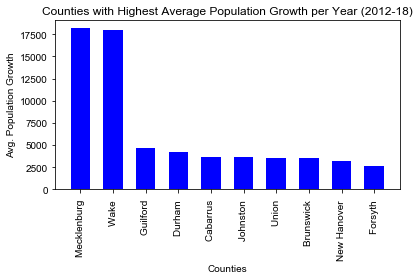

In [46]:
# bar chart for average population growth from 2012-18
x_axis = np.arange(len(top_popchange['County']))
y_axis = top_popchange['Avg. Pop. Change (2012-18)']

plt.bar(x_axis, y_axis, width=0.6, color='b', align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, top_popchange['County'], rotation = 'vertical')

plt.xlabel('Counties')
plt.ylabel('Avg. Population Growth')
plt.title('Counties with Highest Average Population Growth per Year (2012-18)')
plt.style.use('seaborn')

plt.tight_layout()
plt.savefig('img/highest_pop_growth.png')
plt.show()

In [47]:
ncvoting_summary = ncvoting_summary.sort_values('Votes by County (2016)', ascending=False).reset_index()
ncvoting_summary

,index,County,Party,Votes by Party (2012),Percentage by Party (2012),Votes by County (2012),Percentage of NC Votes (2012),Votes by Party (2016),Percentage by Party (2016),Votes by County (2016),Percentage of NC Votes (2016)
0,275,WAKE,REP,211596,0.436254,485029,0.107945,196082,0.378334,518278,0.110694
1,274,WAKE,LIB,6171,0.012723,485029,0.107945,19460,0.037547,518278,0.110694
2,273,WAKE,DEM,267262,0.551023,485029,0.107945,302736,0.584119,518278,0.110694
3,178,MECKLENBURG,LIB,3920,0.008753,447850,0.099671,15488,0.033267,465568,0.099436
4,177,MECKLENBURG,DEM,272262,0.607931,447850,0.099671,294562,0.632694,465568,0.099436
...,...,...,...,...,...,...,...,...,...,...,...
295,141,HYDE,DEM,1163,0.489066,2378,0.000529,965,0.420479,2295,0.000490
296,142,HYDE,LIB,22,0.009251,2378,0.000529,42,0.018301,2295,0.000490
297,265,TYRRELL,LIB,11,0.006187,1778,0.000396,28,0.016251,1723,0.000368
298,266,TYRRELL,REP,930,0.523060,1778,0.000396,975,0.565873,1723,0.000368


In [48]:
top_voting_counties = pd.DataFrame(ncvoting_summary.loc[0:29])
top_voting_counties = pd.DataFrame(top_voting_counties.drop(columns='index'))
top_voting_counties

,County,Party,Votes by Party (2012),Percentage by Party (2012),Votes by County (2012),Percentage of NC Votes (2012),Votes by Party (2016),Percentage by Party (2016),Votes by County (2016),Percentage of NC Votes (2016)
0,WAKE,REP,211596,0.436254,485029,0.107945,196082,0.378334,518278,0.110694
1,WAKE,LIB,6171,0.012723,485029,0.107945,19460,0.037547,518278,0.110694
2,WAKE,DEM,267262,0.551023,485029,0.107945,302736,0.584119,518278,0.110694
3,MECKLENBURG,LIB,3920,0.008753,447850,0.099671,15488,0.033267,465568,0.099436
4,MECKLENBURG,DEM,272262,0.607931,447850,0.099671,294562,0.632694,465568,0.099436
5,MECKLENBURG,REP,171668,0.383316,447850,0.099671,155518,0.334039,465568,0.099436
6,GUILFORD,DEM,146365,0.577926,253259,0.056364,149248,0.587443,254064,0.054263
7,GUILFORD,REP,104789,0.413762,253259,0.056364,98062,0.385974,254064,0.054263
8,GUILFORD,LIB,2105,0.008312,253259,0.056364,6754,0.026584,254064,0.054263
9,FORSYTH,REP,79768,0.459334,173660,0.038649,75975,0.432145,175809,0.037549


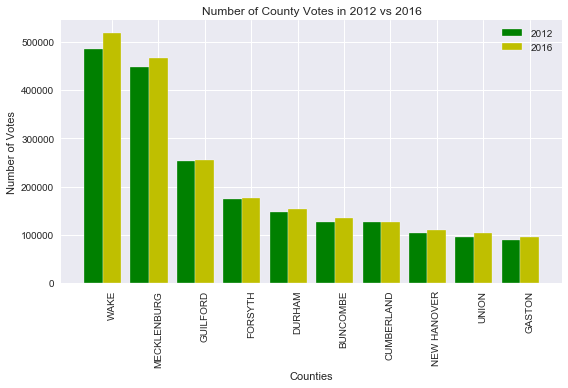

In [49]:
# graph 2012 vs 2016 by top counties 
counties = top_voting_counties['County']
counties = counties.drop_duplicates()

countyvotes_2012 = top_voting_counties['Votes by County (2012)']
countyvotes_2012 = countyvotes_2012.drop_duplicates()

countyvotes_2016 = top_voting_counties['Votes by County (2016)']
countyvotes_2016 = countyvotes_2016.drop_duplicates()

barWidth = 0.4

x_axis1 = np.arange(len(counties))
x_axis2 = [x + barWidth for x in x_axis1]

plt.bar(x_axis1, countyvotes_2012, color = 'g', width = barWidth, edgecolor='white', label = '2012')
plt.bar(x_axis2, countyvotes_2016, color = 'y', width = barWidth, edgecolor='white', label = '2016')

plt.xlabel('Counties')
plt.ylabel('Number of Votes')
plt.title('Number of County Votes in 2012 vs 2016')
plt.legend(loc='best')
plt.xticks([r + barWidth for r in range(len(counties))], counties, rotation = 'vertical')
plt.style.use('seaborn')

plt.tight_layout()
plt.savefig('img/county_votes_2012_2016.png')
plt.show()

In [50]:
# isolate data for graphs by county by party
grouped_party = pd.DataFrame(top_voting_counties[['County', 'Party', 'Percentage by Party (2012)', 'Percentage by Party (2016)']])
grouped_party.head()

,County,Party,Percentage by Party (2012),Percentage by Party (2016)
0,WAKE,REP,0.436254,0.378334
1,WAKE,LIB,0.012723,0.037547
2,WAKE,DEM,0.551023,0.584119
3,MECKLENBURG,LIB,0.008753,0.033267
4,MECKLENBURG,DEM,0.607931,0.632694


In [51]:
pivot_party2012 = grouped_party.pivot_table(index='County', columns='Party', values= 'Percentage by Party (2012)').reset_index()
pivot_party2012.style.format({'DEM': '{:.2%}', 'LIB': '{:.2%}', 'REP': '{:.2%}'})

Party,County,DEM,LIB,REP
0,BUNCOMBE,55.59%,1.35%,43.06%
1,CUMBERLAND,59.50%,0.73%,39.77%
2,DURHAM,76.00%,0.92%,23.08%
3,FORSYTH,53.16%,0.90%,45.93%
4,GASTON,36.76%,1.03%,62.21%
5,GUILFORD,57.79%,0.83%,41.38%
6,MECKLENBURG,60.79%,0.88%,38.33%
7,NEW HANOVER,47.11%,1.22%,51.67%
8,UNION,34.37%,0.96%,64.67%
9,WAKE,55.10%,1.27%,43.63%


In [52]:
pivot_party2016 = grouped_party.pivot_table(index='County', columns='Party', values = 'Percentage by Party (2016)').reset_index()
pivot_party2016.style.format({'DEM':'{:.2%}', 'LIB':'{:.2%}','REP':'{:.2%}'})

Party,County,DEM,LIB,REP
0,BUNCOMBE,55.70%,3.16%,41.13%
1,CUMBERLAND,56.72%,2.67%,40.61%
2,DURHAM,78.94%,2.60%,18.46%
3,FORSYTH,53.73%,3.05%,43.21%
4,GASTON,32.67%,2.56%,64.76%
5,GUILFORD,58.74%,2.66%,38.60%
6,MECKLENBURG,63.27%,3.33%,33.40%
7,NEW HANOVER,46.23%,3.58%,50.19%
8,UNION,32.90%,3.19%,63.91%
9,WAKE,58.41%,3.75%,37.83%


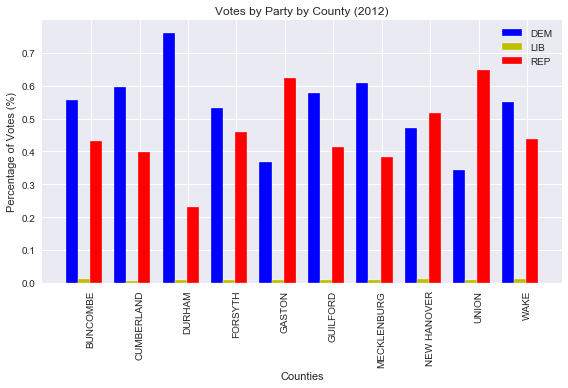

In [53]:
# graph for 2012 votes by county by party
alphabetic_counties = pivot_party2012['County']

countydem_2012 = pivot_party2012['DEM']
countylib_2012 = pivot_party2012['LIB']
countyrep_2012 = pivot_party2012['REP']

barwidth = 0.25

x_axis_1 = np.arange(len(alphabetic_counties))
x_axis_2 = [x + barwidth for x in x_axis_1]
x_axis_3 = [x + barwidth for x in x_axis_2]

plt.bar(x_axis_1, countydem_2012, width=barwidth, edgecolor='white', label= 'DEM', color='b')
plt.bar(x_axis_2, countylib_2012, width=barwidth, edgecolor='white', label= 'LIB', color='y')
plt.bar(x_axis_3, countyrep_2012, width=barwidth, edgecolor='white', label= 'REP', color='r')

plt.xlabel('Counties')
plt.ylabel('Percentage of Votes (%)')
plt.title('Votes by Party by County (2012)')
plt.legend(loc='best')
plt.xticks([r + barWidth for r in range(len(alphabetic_counties))], alphabetic_counties, rotation = 'vertical')
plt.style.use('seaborn')

plt.tight_layout()
plt.savefig('img/votesbypartybycounty_2012.png')
plt.show()

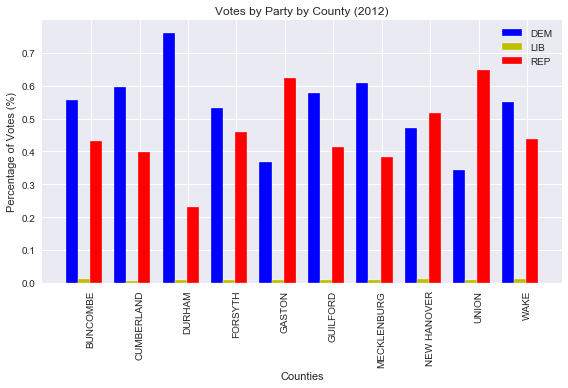

In [54]:
# graph for 2012 votes by county by party
countydem_2016 = pivot_party2016['DEM']
countylib_2016 = pivot_party2016['LIB']
countyrep_2016 = pivot_party2016['REP']

barwidth = 0.25

x_axis_1 = np.arange(len(alphabetic_counties))
x_axis_2 = [x + barwidth for x in x_axis_1]
x_axis_3 = [x + barwidth for x in x_axis_2]

plt.bar(x_axis_1, countydem_2012, width=barwidth, edgecolor='white', label= 'DEM', color='b')
plt.bar(x_axis_2, countylib_2012, width=barwidth, edgecolor='white', label= 'LIB', color='y')
plt.bar(x_axis_3, countyrep_2012, width=barwidth, edgecolor='white', label= 'REP', color='r')

plt.xlabel('Counties')
plt.ylabel('Percentage of Votes (%)')
plt.title('Votes by Party by County (2012)')
plt.legend(loc='best')
plt.xticks([r + barWidth for r in range(len(alphabetic_counties))], alphabetic_counties, rotation = 'vertical')
plt.style.use('seaborn')

plt.tight_layout()
plt.savefig('img/votesbypartybycounty_2016.png')
plt.show()

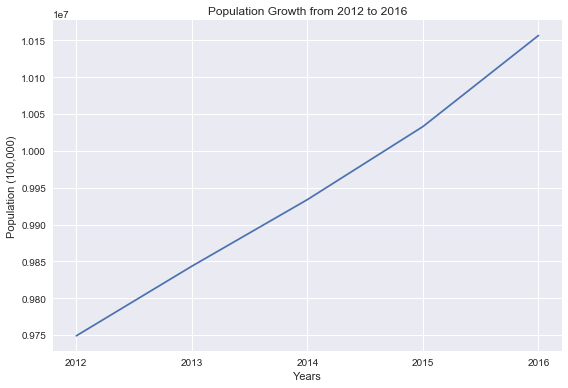

In [55]:
# create a line graph and find regression line for population
# calculate total population by year and create a series

total_pop2012 = county_pop_df['2012'].sum()
total_pop2013 = county_pop_df['2013'].sum()
total_pop2014 = county_pop_df['2014'].sum()
total_pop2015 = county_pop_df['2015'].sum()
total_pop2016 = county_pop_df['2016'].sum()


total_pop_series = pd.Series([total_pop2012, total_pop2013, total_pop2014, total_pop2015, total_pop2016])

years = ['2012', '2013', '2014', '2015', '2016']

axis_x = np.arange(len(years))

plt.plot(axis_x, total_pop_series)

tick_locations = [value for value in axis_x]
plt.xticks(tick_locations, years)
plt.style.use('seaborn')

plt.xlabel('Years')
plt.ylabel('Population (100,000)')
plt.title('Population Growth from 2012 to 2016')

plt.tight_layout()
plt.savefig('img/populationgrowth.png')
plt.show()

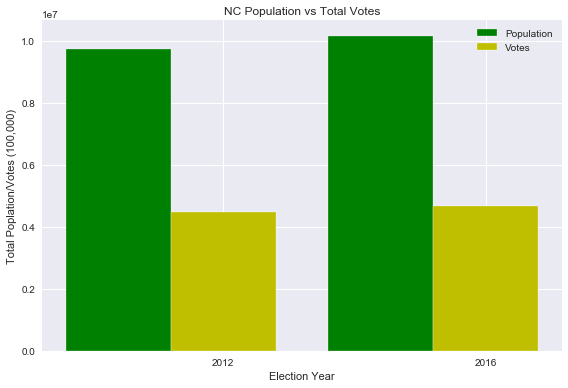

In [56]:
# create a graph comparing total population vs total votes 
total_pop_series = pd.Series([total_pop_2012, total_pop_2016])
total_votes_series = pd.Series([total_votes_2012, total_votes_2016])
election_year = ['2012', '2016']
 

axis_x1 = np.arange(len(election_year))
axis_x2 = [x + barWidth for x in axis_x1]

plt.bar(axis_x1, total_pop_series, width = barWidth, edgecolor='white', color = 'g', label='Population')
plt.bar(axis_x2, total_votes_series, width = barWidth, edgecolor='white', color = 'y', label='Votes')

plt.xlabel('Election Year')
plt.ylabel('Total Poplation/Votes (100,000)')
plt.title('NC Population vs Total Votes')
plt.legend(loc='best')

tick_locations = [value for value in axis_x1]
plt.xticks([r + barWidth for r in tick_locations], election_year)
plt.style.use('seaborn')

plt.tight_layout()
plt.savefig('img/population_votes.png')
plt.show()

In [57]:
# merge voting by party results 
party_db_2012 = party_db_2012.reset_index()
party_db_2016 = party_db_2016.reset_index()
party_db_2016 = party_db_2016.rename(columns={'Choice Party':'party'})

voting_by_party = pd.merge(party_db_2012, party_db_2016, on='party')
voting_by_party

,party,total votes,percentage,Total Votes,Percentages
0,DEM,2178391,0.484809,2189316,0.467595
1,LIB,44515,0.009907,130126,0.027792
2,REP,2270395,0.505284,2362631,0.504612


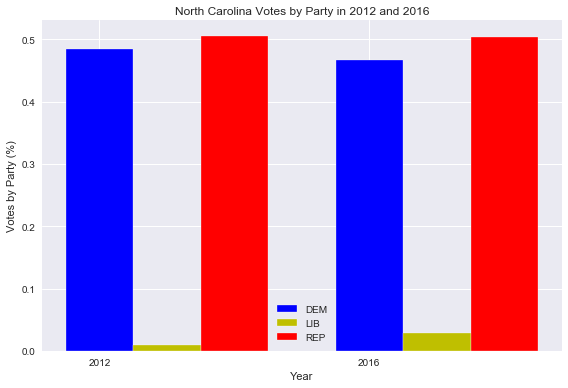

In [58]:
# create a graph comparing how NC Voted by party in 2012 and 2016 

dem_votes = [voting_by_party.iloc[0,2], voting_by_party.iloc[0,4]]
rep_votes = [voting_by_party.iloc[2,2], voting_by_party.iloc[2,4]]
lib_votes = [voting_by_party.iloc[1,2], voting_by_party.iloc[1,4]]

bar_width=0.25

x_axis = np.arange(len(election_year))
x_axis2 = [x + bar_width for x in x_axis]
x_axis3 = [x + bar_width for x in x_axis2]

plt.bar(x_axis, dem_votes, width=bar_width, edgecolor='white', color='b', label='DEM')
plt.bar(x_axis2, lib_votes, width=bar_width, edgecolor='white', color='y', label='LIB')
plt.bar(x_axis3, rep_votes, width=bar_width, edgecolor='white', color='r', label='REP')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, election_year)
plt.style.use('seaborn')

plt.xlabel('Year')
plt.ylabel('Votes by Party (%)')
plt.title('North Carolina Votes by Party in 2012 and 2016')
plt.legend(loc='best')

plt.tight_layout()
plt.savefig('img/ncvotesbyparty.png')
plt.show()

In [61]:
# create a graph for top counties for 2012 and 2016 by party voting
top_voting_counties = top_voting_counties.set_index('County')

In [62]:
# wake county
wake_voting = top_voting_counties.loc['WAKE']
wake_voting

,Party,Votes by Party (2012),Percentage by Party (2012),Votes by County (2012),Percentage of NC Votes (2012),Votes by Party (2016),Percentage by Party (2016),Votes by County (2016),Percentage of NC Votes (2016)
County,,,,,,,,,
WAKE,REP,211596,0.436254,485029,0.107945,196082,0.378334,518278,0.110694
WAKE,LIB,6171,0.012723,485029,0.107945,19460,0.037547,518278,0.110694
WAKE,DEM,267262,0.551023,485029,0.107945,302736,0.584119,518278,0.110694


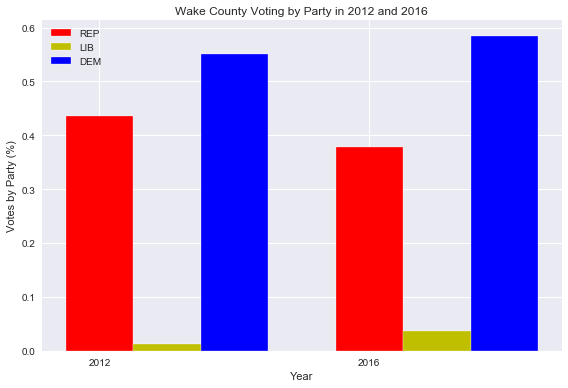

In [71]:
wake_Rep = [wake_voting.iloc[0, 2], wake_voting.iloc[0, 6]]
wake_Lib = [wake_voting.iloc[1, 2], wake_voting.iloc[1, 6]]
wake_Dem = [wake_voting.iloc[2, 2], wake_voting.iloc[2, 6]]

x_axis = np.arange(len(election_year))
x_axis2 = [x + bar_width for x in x_axis]
x_axis3 = [x + bar_width for x in x_axis2]

plt.bar(x_axis, wake_Rep, width=bar_width, edgecolor='white', color='r', label='REP')
plt.bar(x_axis2, wake_Lib, width=bar_width, edgecolor='white', color='y', label='LIB')
plt.bar(x_axis3, wake_Dem,  width=bar_width, edgecolor='white', color='b', label='DEM')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, election_year)
plt.style.use('seaborn')

plt.xlabel('Year')
plt.ylabel('Votes by Party (%)')
plt.title('Wake County Voting by Party in 2012 and 2016')
plt.legend(loc='best')

plt.tight_layout()
plt.savefig('img/wakevoting.png')
plt.show()

In [66]:
# mecklenburg county
meck_county = top_voting_counties.loc['MECKLENBURG']
meck_county

,Party,Votes by Party (2012),Percentage by Party (2012),Votes by County (2012),Percentage of NC Votes (2012),Votes by Party (2016),Percentage by Party (2016),Votes by County (2016),Percentage of NC Votes (2016)
County,,,,,,,,,
MECKLENBURG,LIB,3920,0.008753,447850,0.099671,15488,0.033267,465568,0.099436
MECKLENBURG,DEM,272262,0.607931,447850,0.099671,294562,0.632694,465568,0.099436
MECKLENBURG,REP,171668,0.383316,447850,0.099671,155518,0.334039,465568,0.099436


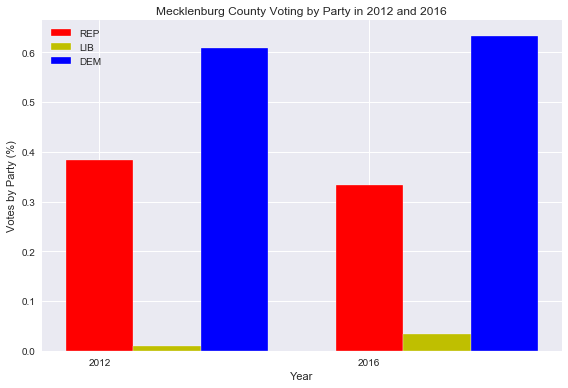

In [70]:
meck_Rep = [meck_county.iloc[2,2], meck_county.iloc[2,6]]
meck_Lib = [meck_county.iloc[0,2], meck_county.iloc[0,6]]
meck_Dem = [meck_county.iloc[1,2], meck_county.iloc[1,6]]

bar_width = 0.25

x_axis = np.arange(len(election_year))
plt.bar(x_axis, meck_Rep, width=bar_width, edgecolor='white', color='r', label='REP')
plt.bar(x_axis2, meck_Lib, width=bar_width, edgecolor='white', color='y', label='LIB')
plt.bar(x_axis3, meck_Dem,  width=bar_width, edgecolor='white', color='b', label='DEM')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, election_year)
plt.style.use('seaborn')

plt.xlabel('Year')
plt.ylabel('Votes by Party (%)')
plt.title('Mecklenburg County Voting by Party in 2012 and 2016')
plt.legend(loc='best')

plt.tight_layout()
plt.savefig('img/meckvoting.png')
plt.show()